In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from graphviz import Source

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/BankMarketing.csv")

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
Columnsnames = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays'
                ,'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

In [ ]:
data.columns

NameError: ignored

In [ ]:
data.columns = Columnsnames

In [ ]:
columnas_categoricas = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
columnas_numericas   = ['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']

In [ ]:
data[columnas_numericas].describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data[columnas_numericas].head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
data[columnas_numericas].isnull().sum()/data.shape[0]*100

age               0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
emp_var_rate      0.0
cons_price_idx    0.0
cons_conf_idx     0.0
euribor3m         0.0
nr_employed       0.0
dtype: float64

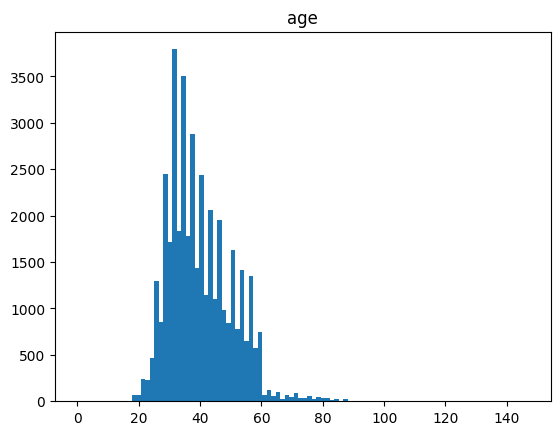

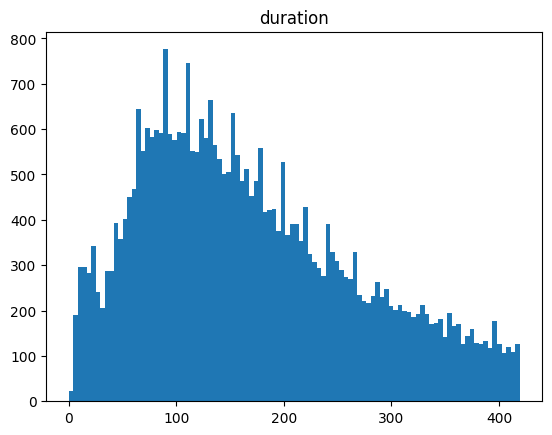

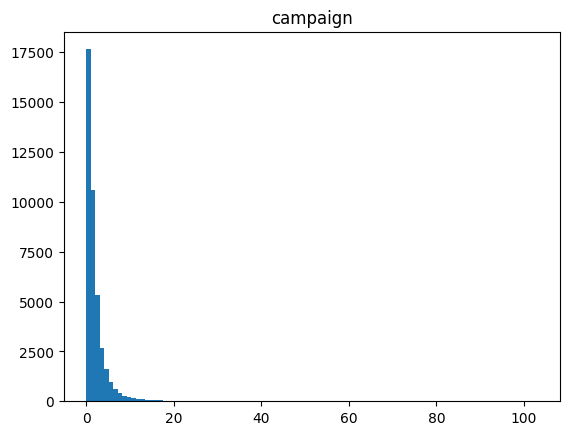

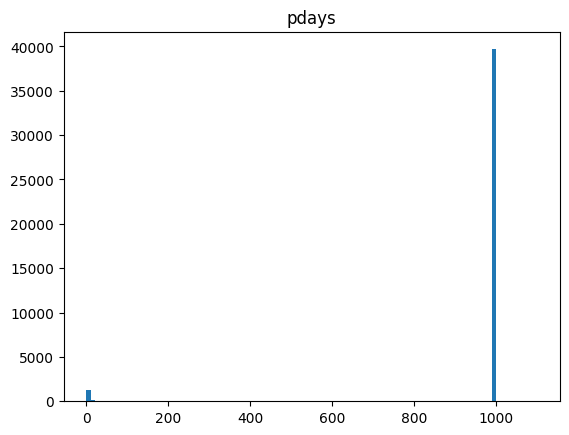

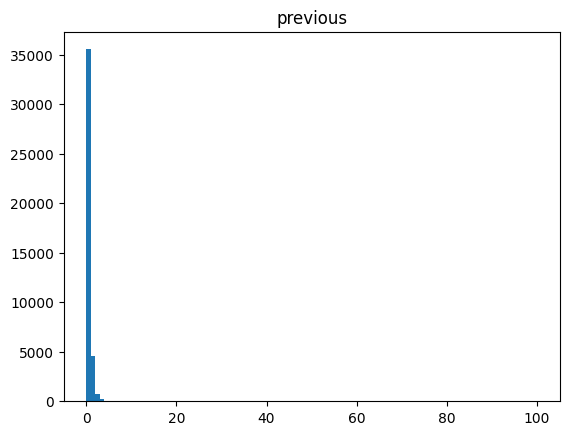

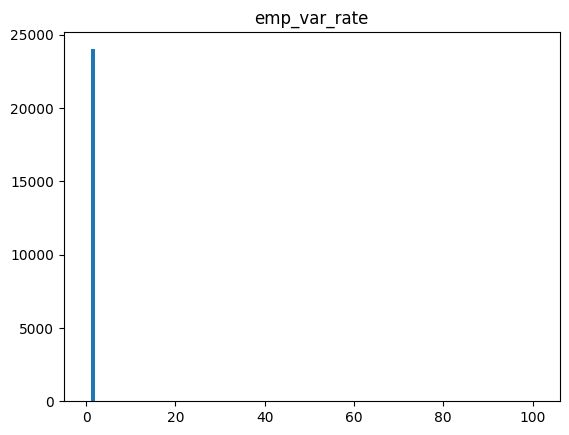

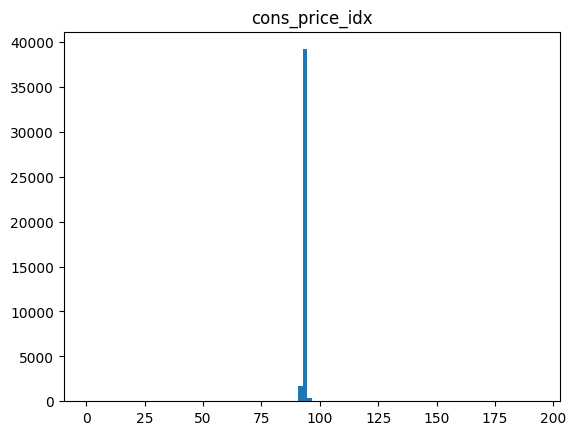

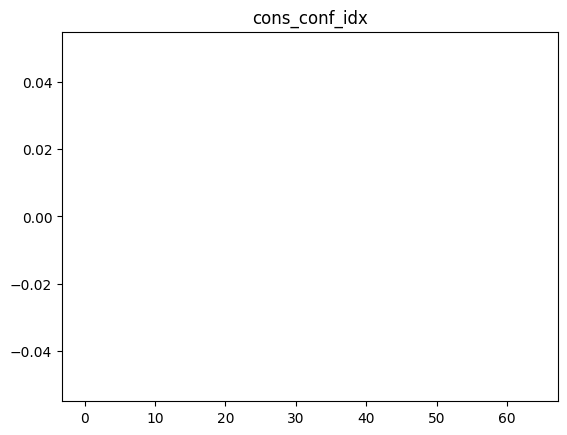

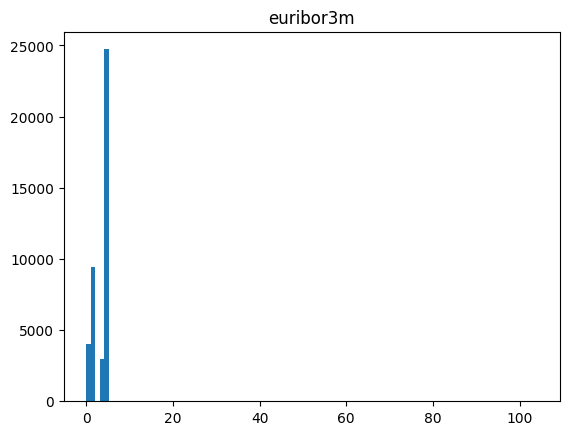

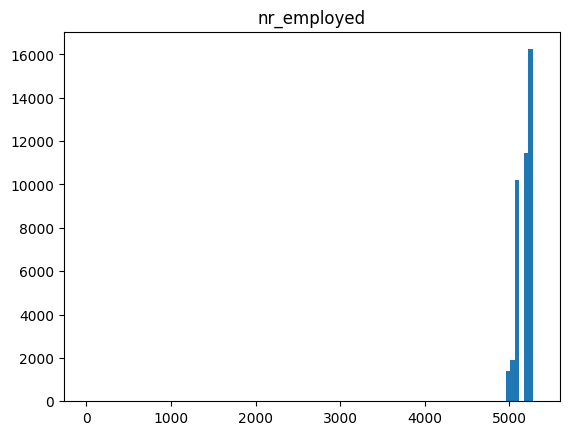

In [ ]:
for x in columnas_numericas:
  Q03 = int(data[x].quantile(0.75))+100
  plt.title(data[x].name)
  plt.hist(data[x], bins= 100,range=(0,Q03))
  plt.show()

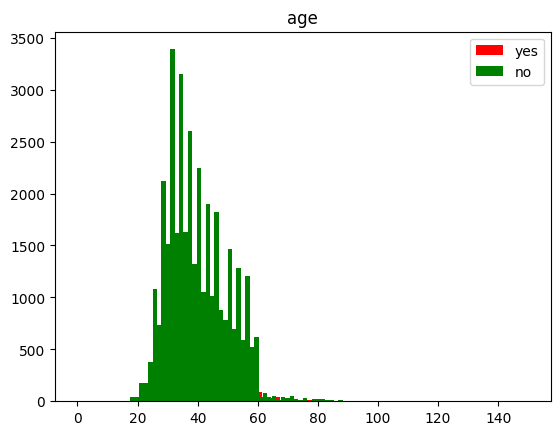

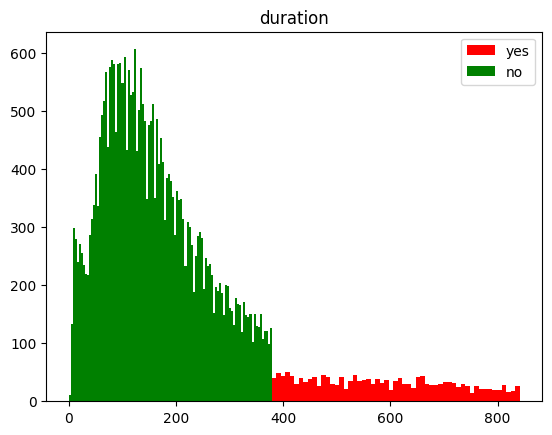

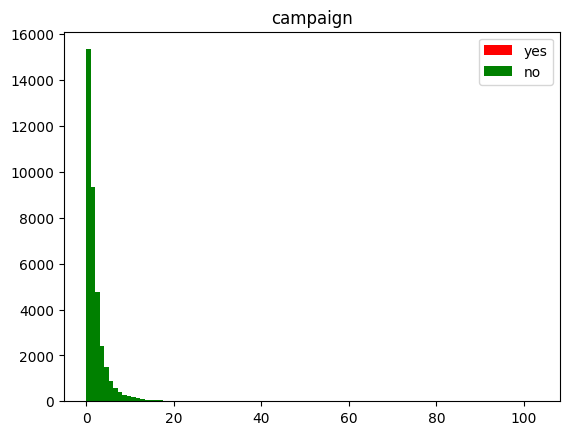

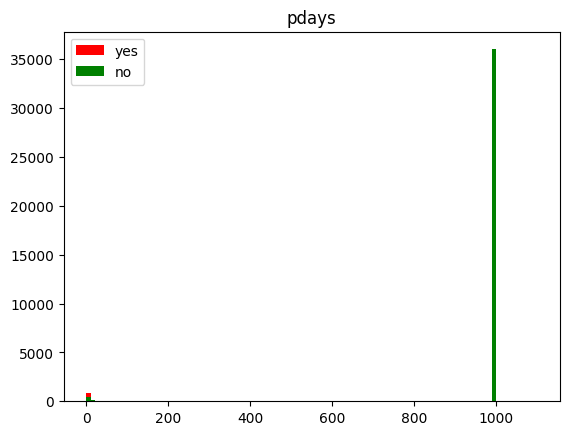

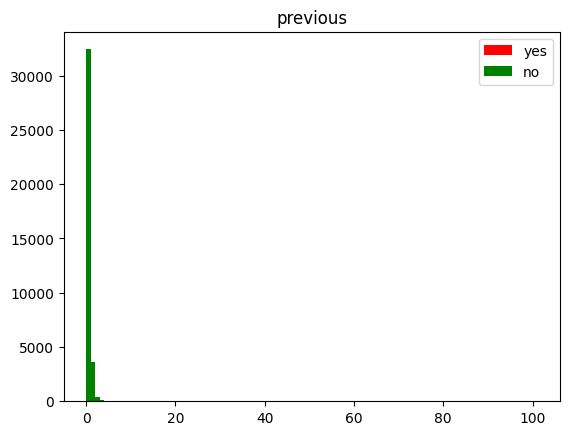

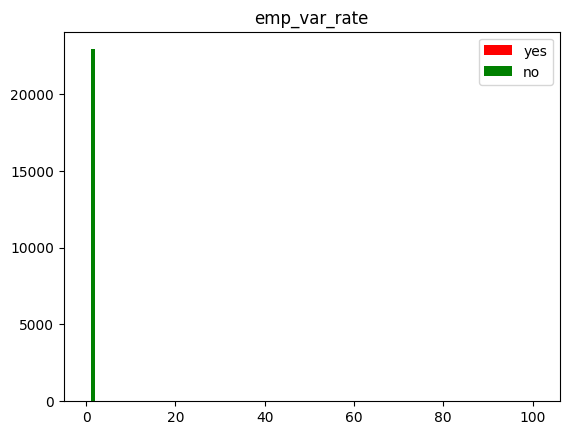

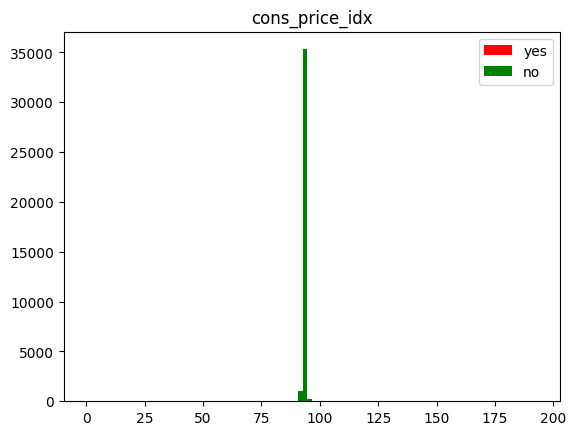

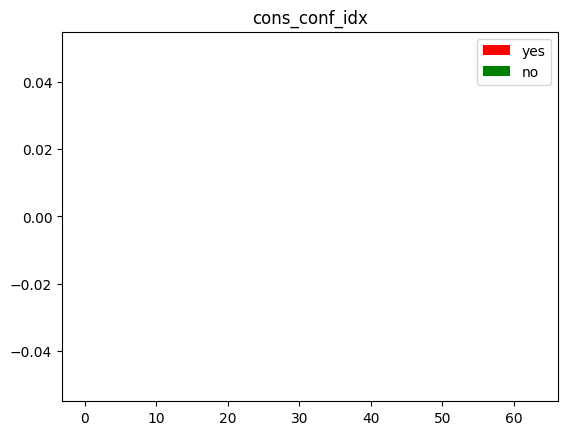

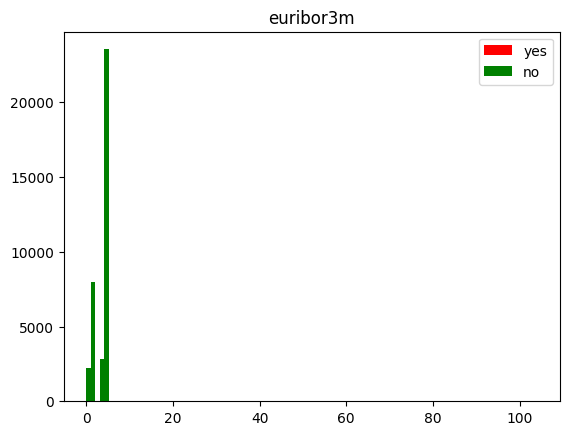

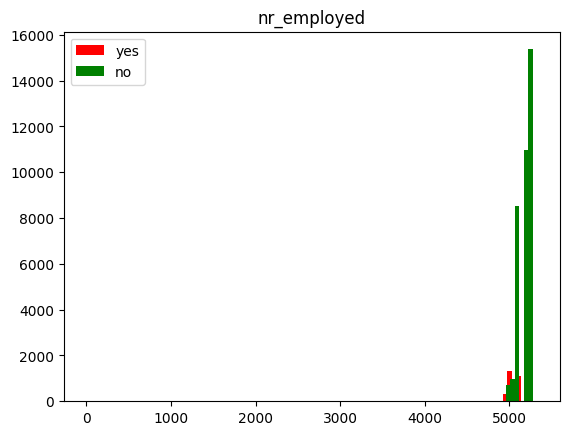

In [ ]:
for x in columnas_numericas:
  x1 = data.loc[data.y =='yes', x]
  x2 = data.loc[data.y =='no', x]
  Q03x1 = ((pd.DataFrame(x1)[x].quantile(0.75))+100).astype(int)
  Q03x2 = ((pd.DataFrame(x2)[x].quantile(0.75))+100).astype(int)

  plt.title(data[x].name)
  plt.hist(x1, bins= 100, color='r', range=(0,Q03x1), label='yes')
  plt.hist(x2, bins= 100, color='g', range=(0,Q03x2), label='no')
  plt.legend()
  plt.show()

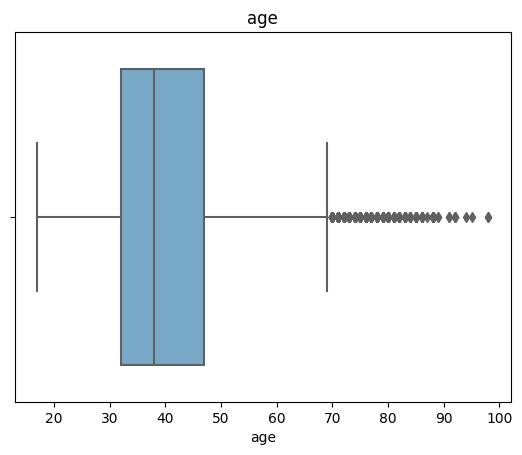

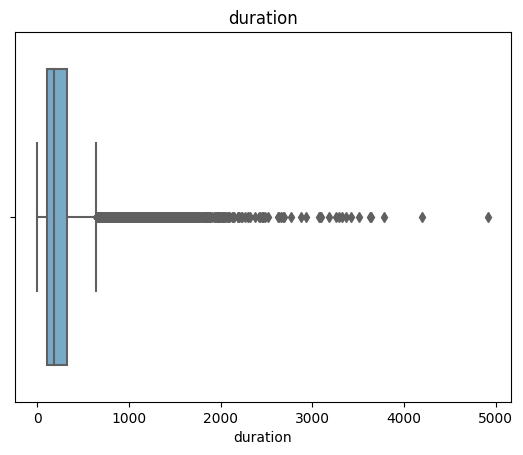

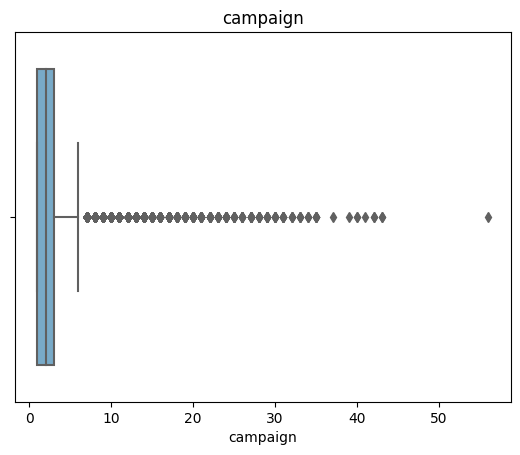

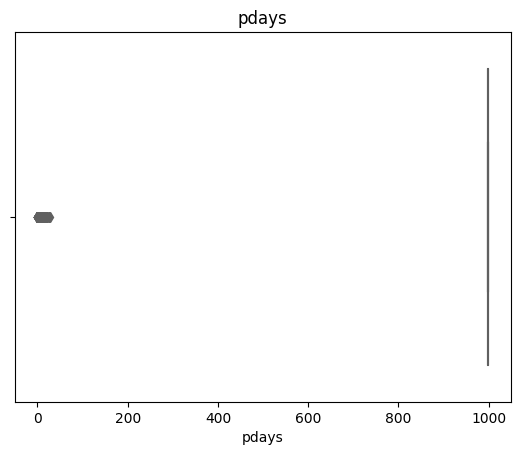

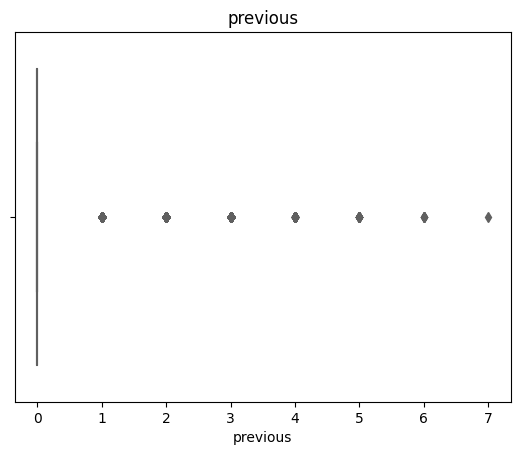

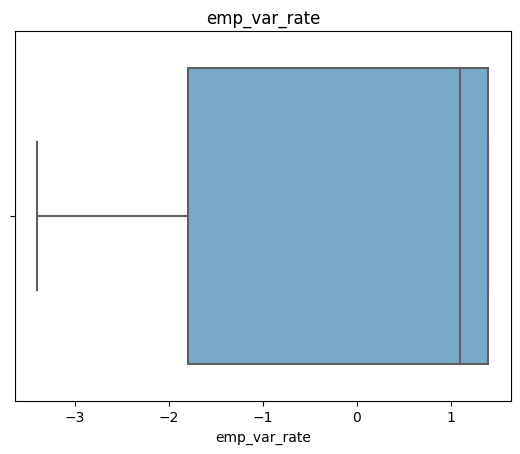

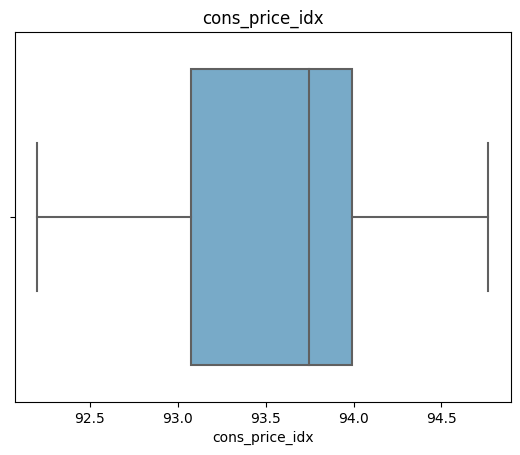

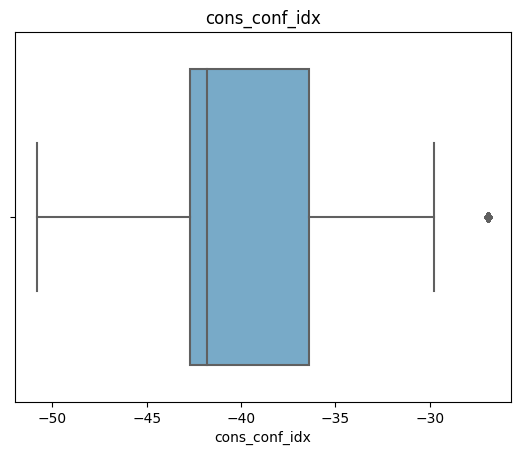

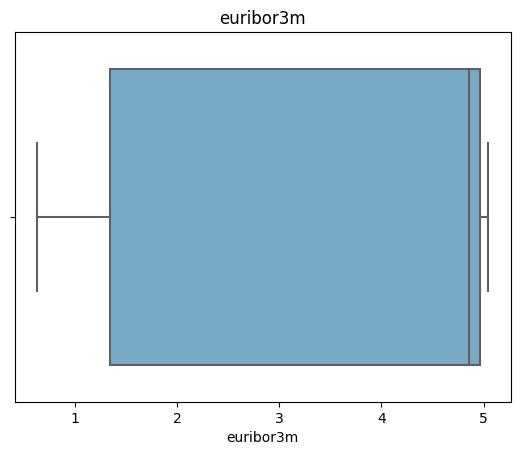

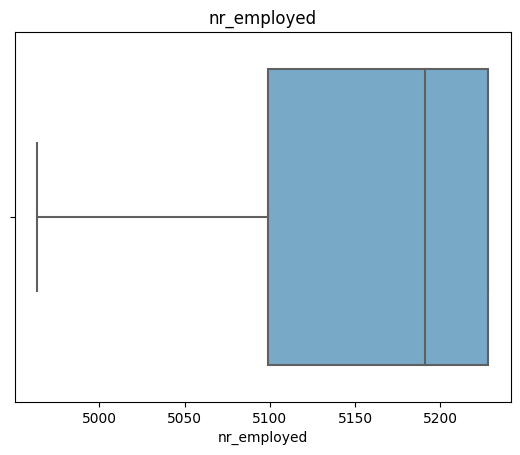

In [ ]:
for x in columnas_numericas:
  plt.title(data[x].name)
  sns.boxplot(x=data[x], palette="Blues");
  plt.show()

In [ ]:
def Cuantiles(lista):
    c = [0,1,5,10,20,30,40,50,60,70,80,90,92.5,95,97.5,99,100]
    matrix = pd.concat([pd.DataFrame(c),pd.DataFrame(np.percentile(lista.dropna(),c))],axis = 1)
    matrix.columns = ["Cuantil","Valor_Variable"]
    return(matrix)

In [ ]:
Cuantiles(data["age"]).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,17.0,23.0,26.0,28.0,31.0,33.0,35.0,38.0,41.0,45.0,49.0,55.0,56.0,58.0,60.0,60.0,60.0


In [ ]:
registros3=data[(data['age']>=60.0) & (data['age']<=98.0)]
registros3.age.count()

1193

In [ ]:
cuantil_975 = np.percentile(data["age"],97.5)

In [ ]:
cuantil_975

60.0

In [ ]:
data.loc[data["age"]>cuantil_975,"age"] = cuantil_975

In [ ]:
Cuantiles(data["duration"]).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.00,97.5,99.00,100.0
Valor_Variable,0.0,11.0,36.0,59.0,89.0,116.0,146.0,180.0,222.0,280.0,368.0,551.0,633.0,752.65,975.0,1271.13,4918.0


In [ ]:
registros2=data[(data['duration']>=551) & (data['duration']<=4918.0)]
registros2.duration.count()

4123

In [ ]:
cuantil_90 = np.percentile(data["duration"],90.0)

In [ ]:
cuantil_90

551.0

In [ ]:
data.loc[data["duration"]>=cuantil_90 ,"duration"] = cuantil_90

NameError: ignored

In [ ]:
Cuantiles(data["campaign"]).transpose()

In [ ]:
registros1=data[(data['campaign']>=7.0	) & (data['campaign']<=56.0)]
registros1.campaign.count()

2406

In [ ]:
cuantil_95 = np.percentile(data["campaign"],95.0)
cuantil_95

7.0

In [ ]:
data.loc[data["campaign"]>=cuantil_95 ,"campaign"] = cuantil_95

In [ ]:
Cuantiles(data["previous"]).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Cuantil,0.0,1.0,5.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,92.5,95.0,97.5,99.0,100.0
Valor_Variable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,7.0


In [ ]:
registros1=data[(data['previous']>=2.0	) & (data['previous']<=7.0)]
registros1.previous.count()

1064

In [ ]:
cuantil_99 = np.percentile(data["previous"],99.0)
cuantil_99

2.0

In [ ]:
data.loc[data["previous"]>=cuantil_99 ,"previous"] = cuantil_99

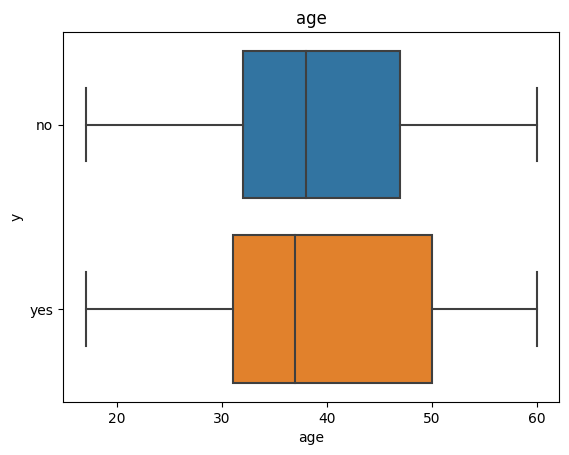

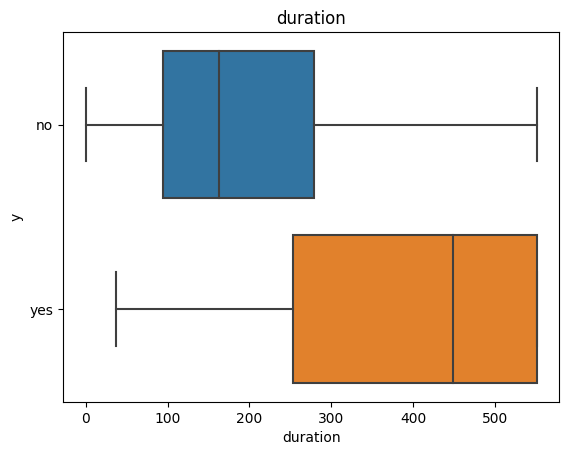

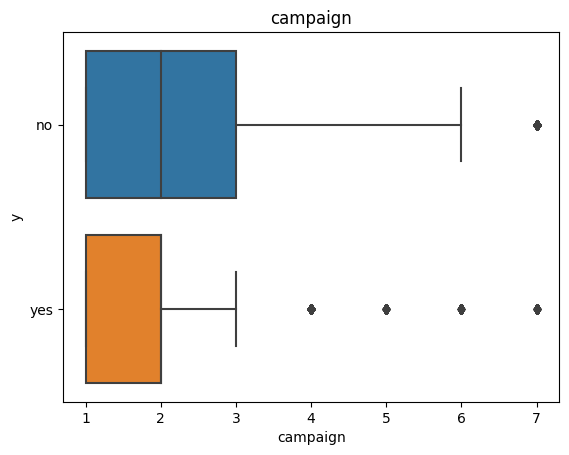

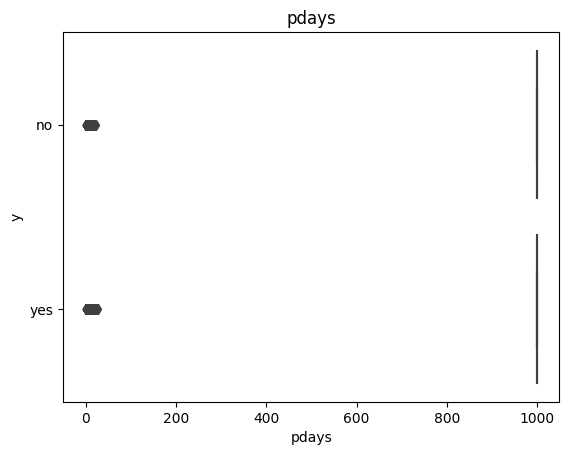

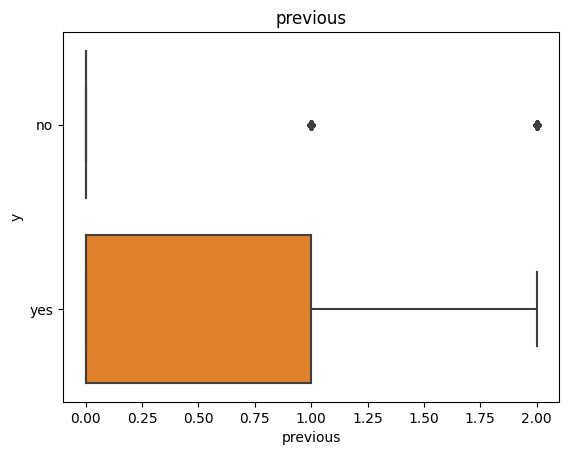

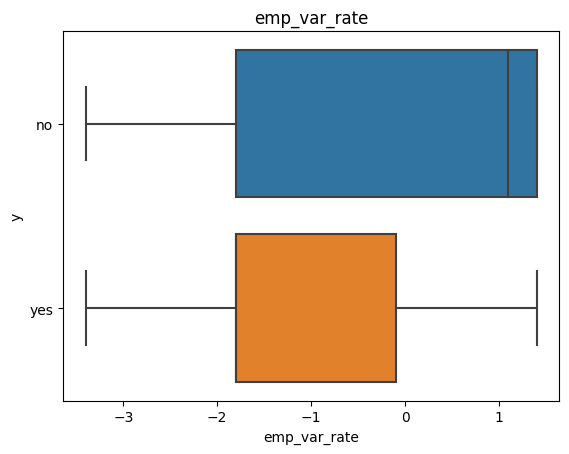

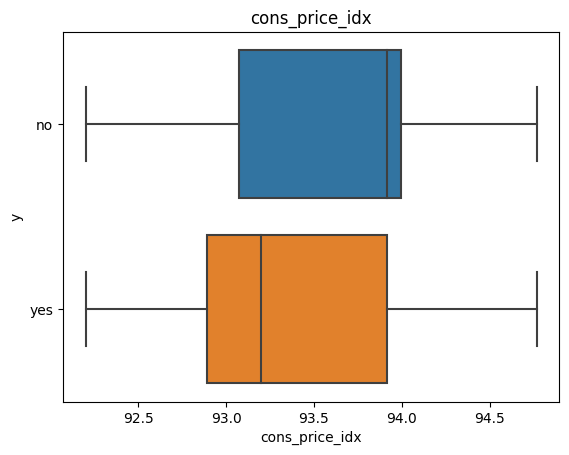

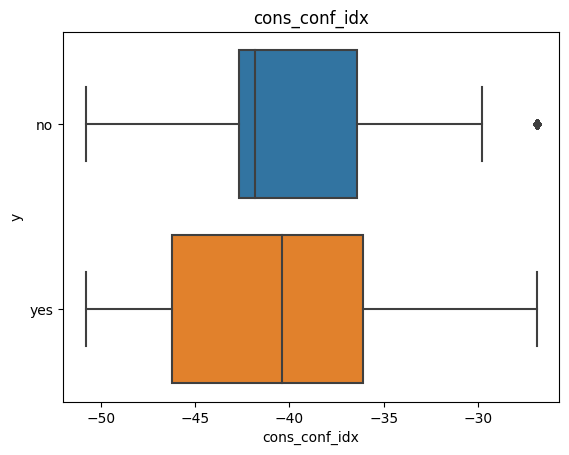

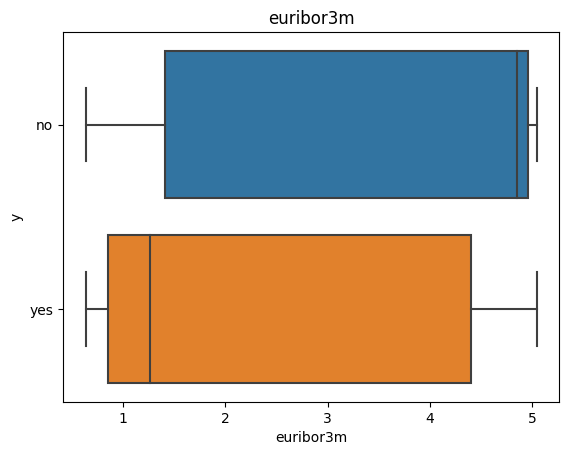

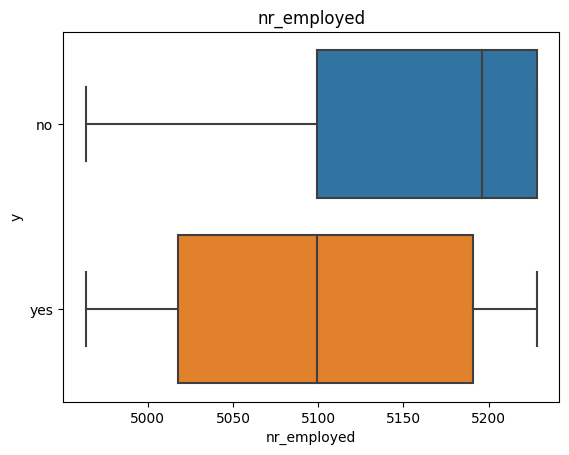

In [ ]:
for x in columnas_numericas:
  plt.title(data[x].name)
  sns.boxplot(x=data[x], y = data.y);
  plt.show()

In [ ]:
data[columnas_categoricas].describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
print(data.shape)
print(data[columnas_categoricas].nunique())

(41188, 21)
job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64


In [ ]:
for x in columnas_categoricas:
    print(x)
    print(data.groupby(x).size())
    print("\n")

job
job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64


marital
marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64


education
education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64


default
default
no         32588
unknown     8597
yes            3
dtype: int64


housing
housing
no         18622
unknown      990
yes        21576
dtype: int64


loan
loan
no         33950
unknown      990
yes         6248
dtype: int64


contact
contact
cellular     26144
telephone    15044
dtype: int64


month
month
apr     26

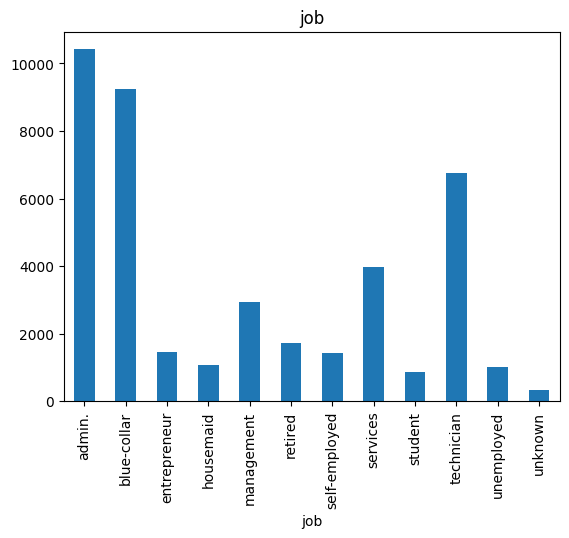

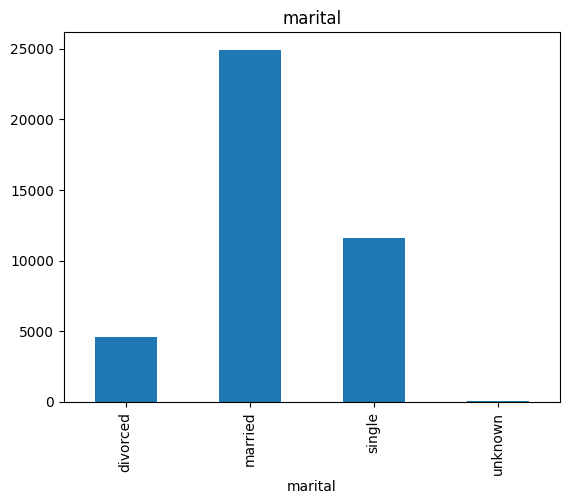

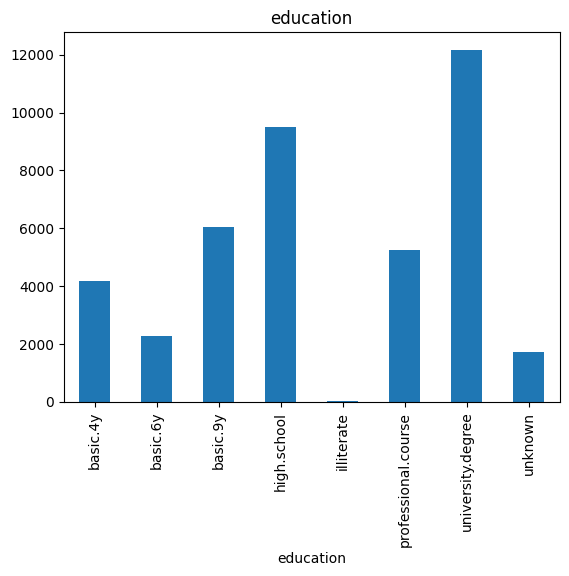

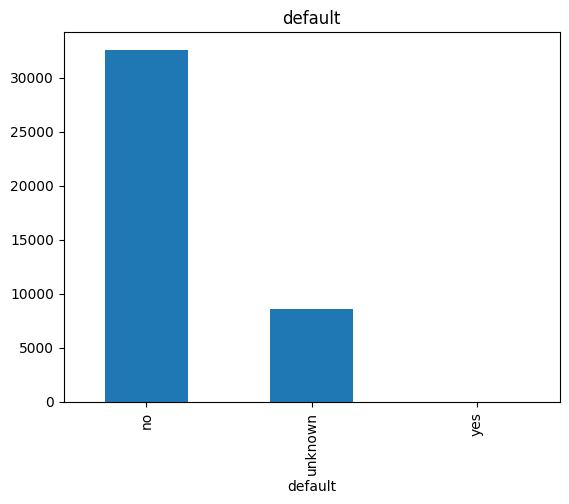

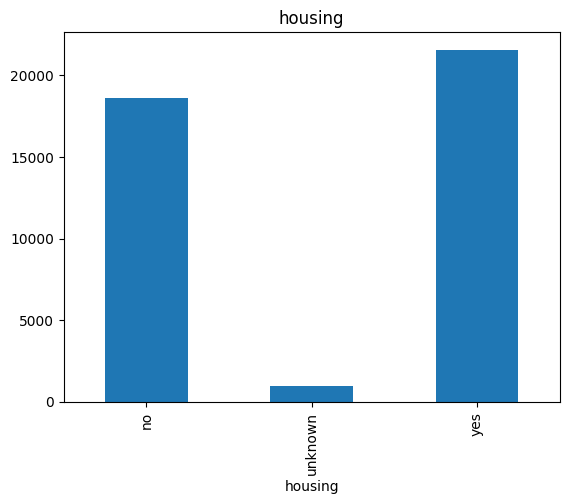

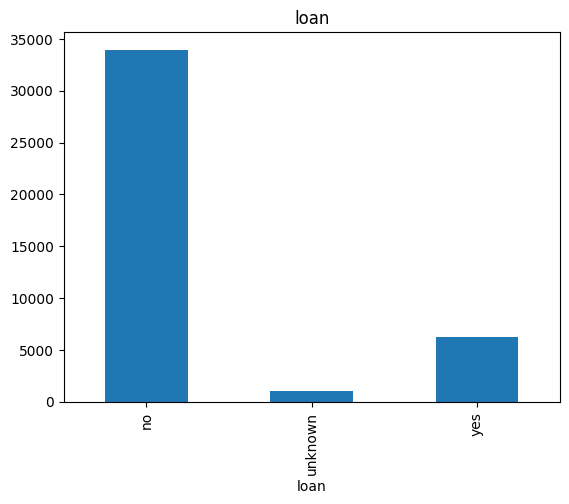

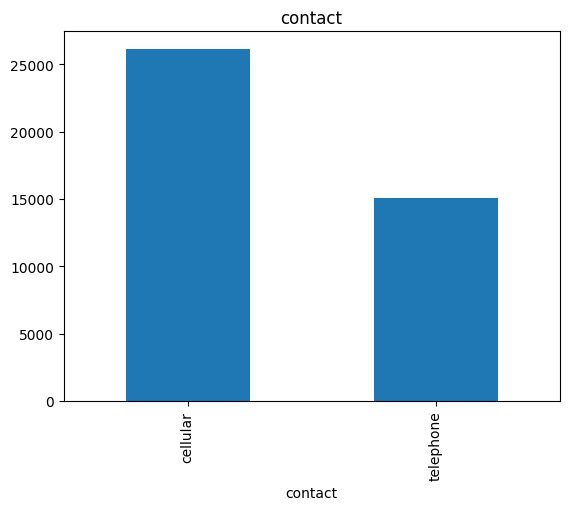

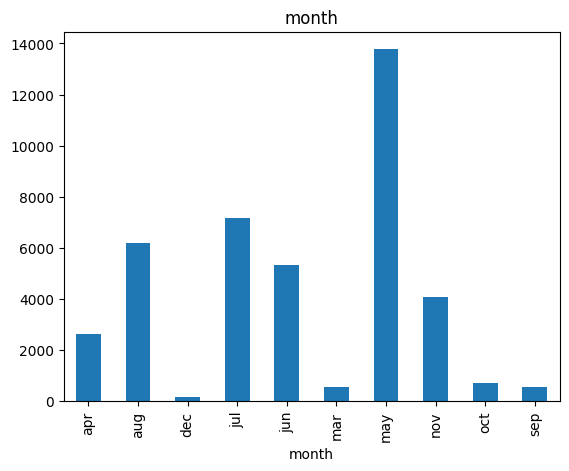

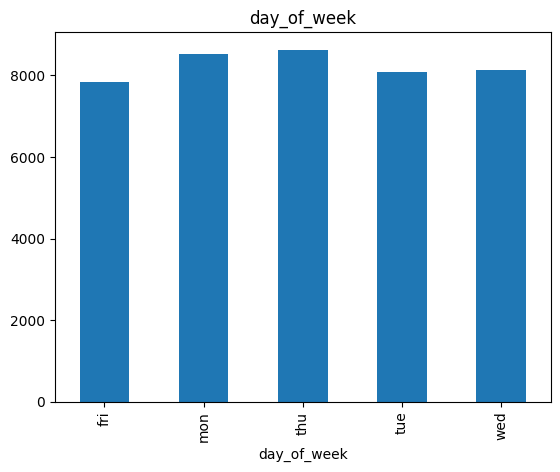

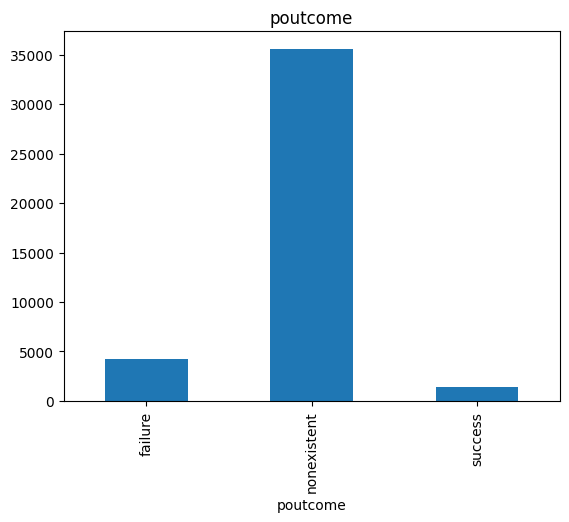

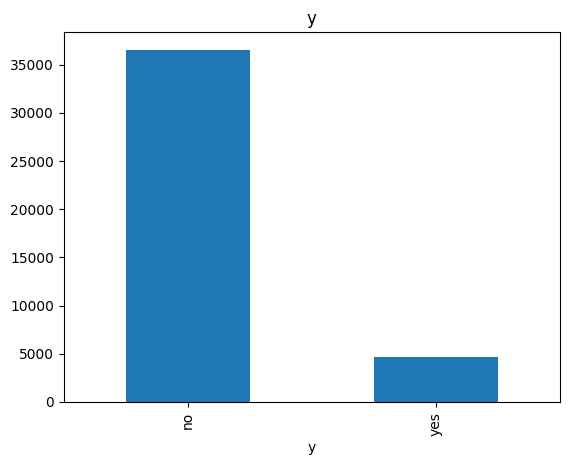

In [ ]:
for x in columnas_categoricas:
  plt.title(x)
  data.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

In [ ]:
data['job'] = data['job'].replace('unknown', 'admin.', regex=True)
data['marital'] = data['marital'].replace('unknown', 'married', regex=True)
data['education'] = data['education'].replace('unknown', 'university.degree', regex=True)
data['default'] = data['default'].replace('unknown', 'no', regex=True)
data['housing'] = data['housing'].replace('unknown', 'yes', regex=True)
data['loan'] = data['loan'].replace('unknown', 'no', regex=True)

In [ ]:
data2=data.sample(n=3000)
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
263,43,admin.,divorced,basic.9y,no,no,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23818,48,services,married,basic.6y,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
3443,31,blue-collar,divorced,basic.9y,no,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
16626,30,blue-collar,married,basic.6y,no,yes,no,cellular,jul,wed,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
7506,45,admin.,married,university.degree,no,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no


In [ ]:
dx= data2.drop('y', axis=1)
columnas_categoricas2 = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
dxcat=dx[columnas_categoricas2]
dy= data2['y']

In [ ]:
dy.describe()

count     3000
unique       2
top         no
freq      2677
Name: y, dtype: object

Codigo de modelo

In [ ]:
label_dict = {}

for col in dxcat:
    label_meaning = {}

    for val in dx[col].unique():
        if val not in label_dict:
            label_dict[val] = len(label_dict)
            label_meaning[label_dict[val]] = val

    dx[col] = dx[col].apply(lambda x: label_dict[x])

    print(f"Significados de los números en {col}: {label_meaning}")

Significados de los números en job: {0: 'admin.', 1: 'services', 2: 'blue-collar', 3: 'technician', 4: 'housemaid', 5: 'entrepreneur', 6: 'management', 7: 'unemployed', 8: 'retired', 9: 'self-employed', 10: 'student'}
Significados de los números en marital: {11: 'divorced', 12: 'married', 13: 'single'}
Significados de los números en education: {14: 'basic.9y', 15: 'basic.6y', 16: 'university.degree', 17: 'high.school', 18: 'professional.course', 19: 'basic.4y', 20: 'illiterate'}
Significados de los números en default: {21: 'no', 22: 'yes'}
Significados de los números en housing: {}
Significados de los números en loan: {}
Significados de los números en contact: {23: 'telephone', 24: 'cellular'}
Significados de los números en month: {25: 'may', 26: 'aug', 27: 'jul', 28: 'jun', 29: 'nov', 30: 'apr', 31: 'oct', 32: 'mar', 33: 'sep', 34: 'dec'}
Significados de los números en day_of_week: {35: 'mon', 36: 'fri', 37: 'thu', 38: 'wed', 39: 'tue'}
Significados de los números en poutcome: {40: 'n

In [ ]:
def train_test_split(X, Y, test_size, random_state):
    df = pd.concat([X, Y], axis=1)

    random.seed(random_state)

    test_data = df.sample(frac=test_size, random_state=random_state)
    train_data = df.drop(test_data.index)

    X_train = train_data.drop(Y.columns, axis=1)
    Y_train = train_data[Y.columns]
    X_test = test_data.drop(Y.columns, axis=1)
    Y_test = test_data[Y.columns]

    return X_train, X_test, Y_train, Y_test

In [ ]:
class Nodo:
    def __init__(self, indice=None, valor=None, grupos=None,gini=None, izquierda=None, derecha=None, terminal=None):
        self.indice = indice
        self.valor = valor
        self.grupos = grupos
        self.gini=gini
        self.izquierda = izquierda
        self.derecha = derecha
        self.terminal = terminal

In [ ]:
def separar(datos, indice, valor):
    izquierda, derecha = list(), list()
    for fila in datos:
        if fila[indice] < valor:
            izquierda.append(fila)
        else:
            derecha.append(fila)
    return izquierda, derecha

def indice_gini(grupos, clases):
    total_instancias = float(sum([len(grupo) for grupo in grupos]))
    gini = 0.0
    for grupo in grupos:
        tamaño = float(len(grupo))
        if tamaño == 0:
            continue
        puntuacion = 0.0
        for clase in clases:
            proporcion = [fila[-1] for fila in grupo].count(clase) / tamaño
            puntuacion += proporcion * proporcion
        gini += (1.0 - puntuacion) * (tamaño / total_instancias)
    return gini

def mejor_separacion(datos):
    valores_clase = list(set(fila[-1] for fila in datos))
    indice_mejor, valor_mejor, puntuacion_mejor, grupos_mejores = 999, 999, 999, None
    for indice in range(len(datos[0])-1):
        for fila in datos:
            grupos = separar(datos, indice, fila[indice])
            gini = indice_gini(grupos, valores_clase)
            if gini < puntuacion_mejor:
                indice_mejor, valor_mejor, puntuacion_mejor, grupos_mejores = indice, fila[indice], gini, grupos
    return Nodo(indice=indice_mejor, valor=valor_mejor, grupos=grupos_mejores,gini=gini)

def a_terminal(grupo):
    resultados = [fila[-1] for fila in grupo]
    return max(set(resultados), key=resultados.count)

def dividir_arbol(nodo, profundidad_max, tamaño_min, profundidad):
    izquierda, derecha = nodo.grupos
    nodo.grupos = None
    if not izquierda or not derecha:
        nodo.izquierda = nodo.derecha = a_terminal(izquierda + derecha)
        return
    if profundidad >= profundidad_max:
        nodo.izquierda, nodo.derecha = a_terminal(izquierda), a_terminal(derecha)
        return
    if len(izquierda) <= tamaño_min:
        nodo.izquierda = a_terminal(izquierda)
    else:
        nodo.izquierda = mejor_separacion(izquierda)
        dividir_arbol(nodo.izquierda, profundidad_max, tamaño_min, profundidad+1)
    if len(derecha) <= tamaño_min:
        nodo.derecha = a_terminal(derecha)
    else:
        nodo.derecha = mejor_separacion(derecha)
        dividir_arbol(nodo.derecha, profundidad_max, tamaño_min, profundidad+1)


def construir_arbol(X_entrenamiento, Y_entrenamiento, profundidad_max, tamaño_min):
    datos = [list(X_entrenamiento.iloc[i]) + [Y_entrenamiento.iloc[i]] for i in range(len(X_entrenamiento))]
    raiz = mejor_separacion(datos)
    dividir_arbol(raiz, profundidad_max, tamaño_min, 1)
    return raiz

def predecir(nodo, fila):
    if fila[nodo.indice] < nodo.valor:
        if isinstance(nodo.izquierda, Nodo):
            return predecir(nodo.izquierda, fila)
        else:
            return nodo.izquierda
    else:
        if isinstance(nodo.derecha, Nodo):
            return predecir(nodo.derecha, fila)
        else:
            return nodo.derecha


PROBANDO

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dx, pd.DataFrame(dy), test_size=0.3, random_state=100)

In [ ]:
arbol = construir_arbol(X_train, Y_train['y'], profundidad_max=4, tamaño_min=25)

In [ ]:
predicciones = []
for i in range(len(X_test)):
      prediccion = predecir(arbol, list(X_test.iloc[i]))
      predicciones.append(prediccion)


In [ ]:
exactitud = sum(predicciones == Y_test['y']) / len(Y_test['y'])
print(exactitud)

0.8944444444444445


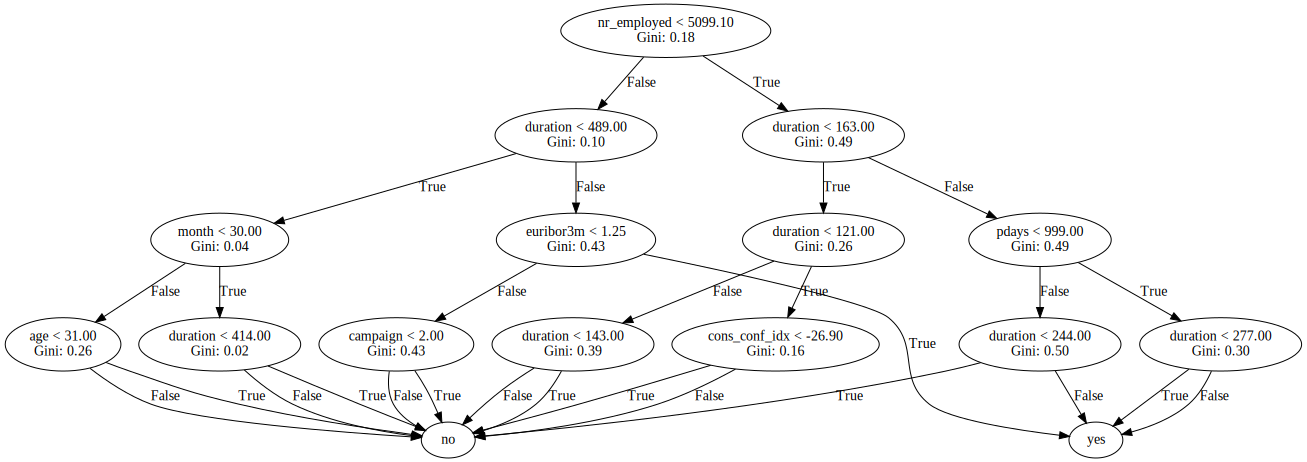

In [ ]:
from graphviz import Digraph, Source

def graficar_arbol(nodo, nombres_variables, dot=None):
    if dot is None:
        dot = Digraph()
    if nodo.terminal is not None:
        dot.node(str(nodo), f"Clase: {nodo.terminal}\nGini: {nodo.gini:.2f}")
    else:
        dot.node(str(nodo), f"{nombres_variables[nodo.indice]} < {nodo.valor:.2f}\nGini: {nodo.gini:.2f}")
        if isinstance(nodo.izquierda, Nodo):
            dot.edge(str(nodo), str(nodo.izquierda), label="True")
            graficar_arbol(nodo.izquierda, nombres_variables, dot)
        else:
            dot.node(str(nodo.izquierda), str(nodo.izquierda))
            dot.edge(str(nodo), str(nodo.izquierda), label="True")
        if isinstance(nodo.derecha, Nodo):
            dot.edge(str(nodo), str(nodo.derecha), label="False")
            graficar_arbol(nodo.derecha, nombres_variables, dot)
        else:
            dot.node(str(nodo.derecha), str(nodo.derecha))
            dot.edge(str(nodo), str(nodo.derecha), label="False")
    return dot

nombres_variables = list(X_train.columns)
dot = graficar_arbol(arbol,nombres_variables)
Source(dot.source)

In [ ]:
newData=pd.concat([dx,dy],axis=1)
newData.to_csv("/content/drive/MyDrive/Data/nuevoCSV.csv", index=False)